Contexto

Asumirás el rol de un consultor de BI contratado por Plato's Pizza, una pizzería de inspiración griega en Nueva Jersey. Te han contratado para ayudar al restaurante a usar datos para mejorar sus operaciones y acabas de recibir la siguiente notificación:

Bienvenido a bordo, ¡estamos contentos de que estés aquí para ayudarnos!

En Plato's todo va bien, pero hay margen de mejora. Hemos recopilado datos transaccionales durante el último año, pero no hemos podido aprovecharlos al máximo. Esperamos que puedas analizarlos y elaborar un informe que nos ayude a encontrar oportunidades para impulsar más ventas y trabajar de forma más eficiente.

Aquí hay algunas preguntas que nos gustaría poder responder:

* ¿En qué días y horarios solemos estar más ocupados?
* ¿Cuántas pizzas hacemos durante las horas pico?
* ¿Cuales son nuestras pizzas más vendidas y las menos vendidas?
* ¿Cuál es nuestro valor de pedido promedio?
* ¿Qué tan bien estamos utilizando nuestra capacidad de asientos? (tenemos 60 asientos)



##Diccionario de variables del dataset:

- order_id:  Identificador único para cada pedido realizado por una mesa

- order_details_id: Identificador único para cada pizza colocada dentro de cada pedido (las pizzas del mismo tipo y tamaño se mantienen en la misma fila y la cantidad aumenta)

- pizza_id: Identificador de clave único que vincula la pizza solicitada con sus detalles, como el tamaño y el precio.

- quantity:Cantidad solicitada de cada pizza del mismo tipo y tamaño

- order_date:Fecha en que se realizó el pedido (ingresado al sistema antes de cocinarlo y servirlo)

- order_time:Hora en que se realizó el pedido (ingresado al sistema antes de cocinarlo y servirlo)

- unit_price:Precio de la pizza en USD

- total_price: precio_unitario * cantidad

- pizza_size:Tamaño de la pizza (Pequeña, Mediana, Grande, Extra Grande o XX Grande)

- pizza_type: Identificador de clave único que vincula la pizza solicitada con sus detalles, como el tamaño y el precio.

- pizza_ingredients:ingredientes utilizados en la pizza como se muestra en el menú (todas incluyen queso mozzarella, incluso si no se especifica; y todas incluyen salsa de tomate, a menos que se especifique otra salsa)

- pizza_name:Nombre de la pizza tal como aparece en el menú.






In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
#Importamos las librerías que vamos a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True

pd.options.display.float_format = '{:15.2f}'.format

In [3]:
#Importamos nuestro dataset principal
df = pd.read_excel("/content/drive/MyDrive/Proyectos_Discovery/Datasets/Pizzeria/sales_pizza.xlsx")
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


###Procedemos a realizar nuestro EDA (Analisis Exploratorio de Datos)

In [4]:
#Revisamos el tipo de variables que tiene nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
#Nuestra variable "order_time" esta como variable de objeto y es una variable de tiempo, porlo tanto vamos a convertir esas 2 variables en una sola
df['order_time'] = df['order_time'].astype(str)

In [6]:
#Nuestra variable "order_datetime" pasara a contener la info de order_date y order_time
df['order_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'])

In [7]:
#Eliminamos las 2 variables de tiempo que ya no vamos a necesitar
df.drop(['order_date', 'order_time'], axis=1, inplace=True)

In [8]:
#Revisamos nuestras variables para ver que todo este en orden
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   unit_price         48620 non-null  float64       
 5   total_price        48620 non-null  float64       
 6   pizza_size         48620 non-null  object        
 7   pizza_category     48620 non-null  object        
 8   pizza_ingredients  48620 non-null  object        
 9   pizza_name         48620 non-null  object        
 10  order_datetime     48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [9]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'order_datetime'],
      dtype='object')

In [10]:
#Reordenamos nuestro dataset para mayot comodidad en el analisis
df = df[['order_datetime', 'order_id', 'order_details_id', 'pizza_id', 'quantity', 'pizza_name', 'pizza_category', 'pizza_ingredients', 'pizza_size', 'unit_price',
       'total_price']]
df

,order_datetime,order_id,order_details_id,pizza_id,quantity,pizza_name,pizza_category,pizza_ingredients,pizza_size,unit_price,total_price
0,2015-01-01 11:38:36,1,1,hawaiian_m,1,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25
1,2015-01-01 11:57:40,2,2,classic_dlx_m,1,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,16.00
2,2015-01-01 11:57:40,2,3,five_cheese_l,1,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,18.50
3,2015-01-01 11:57:40,2,4,ital_supr_l,1,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,20.75
4,2015-01-01 11:57:40,2,5,mexicana_m,1,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31 21:23:10,21348,48616,ckn_alfredo_m,1,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,16.75
48616,2015-12-31 21:23:10,21348,48617,four_cheese_l,1,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,17.95
48617,2015-12-31 21:23:10,21348,48618,napolitana_s,1,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,12.00
48618,2015-12-31 22:09:54,21349,48619,mexicana_l,1,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,20.25


In [11]:
#Verificamos cuantas columnas y filas tiene nuestro dataset
df.shape

(48620, 11)

In [12]:
#Verificamos que no existan faltantes en nuestro dataset
df.isnull().sum()

,0
order_datetime,0
order_id,0
order_details_id,0
pizza_id,0
quantity,0
pizza_name,0
pizza_category,0
pizza_ingredients,0
pizza_size,0
unit_price,0


In [13]:
#Revisamos que no existan entradas duplicadas
df.duplicated().sum()

np.int64(0)

In [14]:
#Asignamos como index a nuestra variable "order_datetime" y las ordenamos de la fecha más antigua a la más reciente
df.isnull().sum()
df.set_index("order_datetime", inplace=True)
df.sort_index(inplace=True)

In [15]:
#Generamos nuevas variables de fecha, día de la semana, semana y mes (Todo esto nos va ayudar  en nuestro analisis)
df["order_date"] = df.index.date
df["day_of_week"] = df.index.day_name()
df["week"] = df.index.isocalendar().week
df["month"] = df.index.month
df.head()

,order_id,order_details_id,pizza_id,quantity,pizza_name,pizza_category,pizza_ingredients,pizza_size,unit_price,total_price,order_date,day_of_week,week,month
order_datetime,,,,,,,,,,,,,,
2015-01-01 11:38:36,1,1,hawaiian_m,1,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25,2015-01-01,Thursday,1,1
2015-01-01 11:57:40,2,2,classic_dlx_m,1,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,16.00,2015-01-01,Thursday,1,1
2015-01-01 11:57:40,2,3,five_cheese_l,1,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,18.50,2015-01-01,Thursday,1,1
2015-01-01 11:57:40,2,4,ital_supr_l,1,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,20.75,2015-01-01,Thursday,1,1
2015-01-01 11:57:40,2,5,mexicana_m,1,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,16.00,2015-01-01,Thursday,1,1


#Procedemos a nuestro Análisis

##Respondiendo a las preguntas del cliente



### ¿En qué días y horarios suele estar más ocupada la pizzería?

Para este punto nos esta diciendo la pregunta "día" y "Horarios" por lo tanto esas 2 variables son clave para nuestro análisis por loq ue vamos a sacar la cantidad de pizzas elaboradas en esos periodos.

In [16]:
#Agruparemos la cantidad de pizzas eaboradas pro día de la semana
ventas_por_dia = df.groupby('day_of_week')['quantity'].sum().sort_values(ascending = False).reset_index()
ventas_por_dia

,day_of_week,quantity
0,Friday,8242
1,Saturday,7493
2,Thursday,7478
3,Wednesday,6946
4,Tuesday,6895
5,Monday,6485
6,Sunday,6035


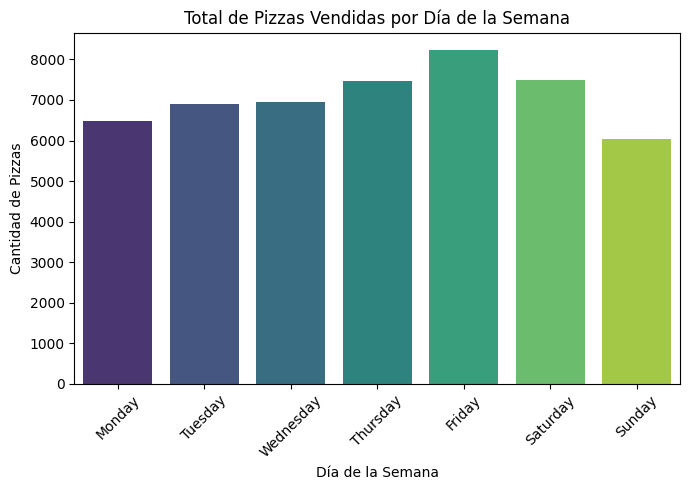

In [17]:
#Realizamos una grafica de barras para comparar visualmente la cantidad de pizzas elaboradas por día

ventas_por_dia = df.groupby('day_of_week')['quantity'].sum().reset_index()

# Asegurar orden correcto
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia['day_of_week'] = pd.Categorical(ventas_por_dia['day_of_week'], categories=orden_dias, ordered=True)
ventas_por_dia = ventas_por_dia.sort_values('day_of_week')

plt.figure(figsize=(7, 5))
sns.barplot(
    data=ventas_por_dia,
    x='day_of_week',
    y='quantity',
    hue='day_of_week',
    palette='viridis',
    legend=False
)

plt.title('Total de Pizzas Vendidas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Pizzas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Respuesta:
- Los días que suelen estar más ocupados son los viernes, sabados y jueves, prácticamente el fin de semana a partir del jueves y a excepción del domingo.

In [18]:
#Vamos a generar una columna que nos indique la hora enla que fue ordenada cada pizza para poder analizar por hora la cantidad de pizzas elaboradas
df['hour'] = df.index.hour
df

,order_id,order_details_id,pizza_id,quantity,pizza_name,pizza_category,pizza_ingredients,pizza_size,unit_price,total_price,order_date,day_of_week,week,month,hour
order_datetime,,,,,,,,,,,,,,,
2015-01-01 11:38:36,1,1,hawaiian_m,1,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25,2015-01-01,Thursday,1,1,11
2015-01-01 11:57:40,2,2,classic_dlx_m,1,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,16.00,2015-01-01,Thursday,1,1,11
2015-01-01 11:57:40,2,3,five_cheese_l,1,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,18.50,2015-01-01,Thursday,1,1,11
2015-01-01 11:57:40,2,4,ital_supr_l,1,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,20.75,2015-01-01,Thursday,1,1,11
2015-01-01 11:57:40,2,5,mexicana_m,1,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,16.00,2015-01-01,Thursday,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:23:10,21348,48616,ckn_alfredo_m,1,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,16.75,2015-12-31,Thursday,53,12,21
2015-12-31 21:23:10,21348,48617,four_cheese_l,1,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,17.95,2015-12-31,Thursday,53,12,21
2015-12-31 21:23:10,21348,48618,napolitana_s,1,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,12.00,2015-12-31,Thursday,53,12,21


In [19]:
#Generamos un objeto que contenga la fecha, hora, día de la semana y cantidad
pizzas_prom_hr = df.groupby(['order_date','hour', 'day_of_week'])['quantity'].sum().reset_index()
pizzas_prom_hr

,order_date,hour,day_of_week,quantity
0,2015-01-01,11,Thursday,6
1,2015-01-01,12,Thursday,17
2,2015-01-01,13,Thursday,33
3,2015-01-01,14,Thursday,15
4,2015-01-01,15,Thursday,14
...,...,...,...,...
4176,2015-12-31,19,Thursday,23
4177,2015-12-31,20,Thursday,17
4178,2015-12-31,21,Thursday,7
4179,2015-12-31,22,Thursday,1


In [20]:
#Una vez que ya obtuvimos nuestra tabla, procedemos a pivitear los datos para el análisis siendo las columnas
# los días de la semana y las filas la hora de su pedido
pivot = df.groupby(['hour', 'day_of_week'])['quantity'].sum().reset_index()
pivot_table = pivot.pivot(index='hour', columns='day_of_week', values='quantity').fillna(0)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=dias_ordenados)

pivot_table

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
9,0.00,4.00,0.00,0.00,0.00,0.00,0.00
10,3.00,0.00,5.00,5.00,0.00,3.00,2.00
11,472.00,426.00,534.00,468.00,388.00,208.00,232.00
12,1126.00,1105.00,1058.00,1149.00,1101.00,633.00,604.00
13,803.00,1018.00,938.00,1131.00,1040.00,794.00,689.00
14,460.00,488.00,516.00,574.00,525.00,530.00,520.00
15,411.00,420.00,465.00,468.00,441.00,525.00,486.00
16,541.00,630.00,571.00,650.00,578.00,646.00,623.00
17,712.00,669.00,772.00,856.00,759.00,729.00,714.00


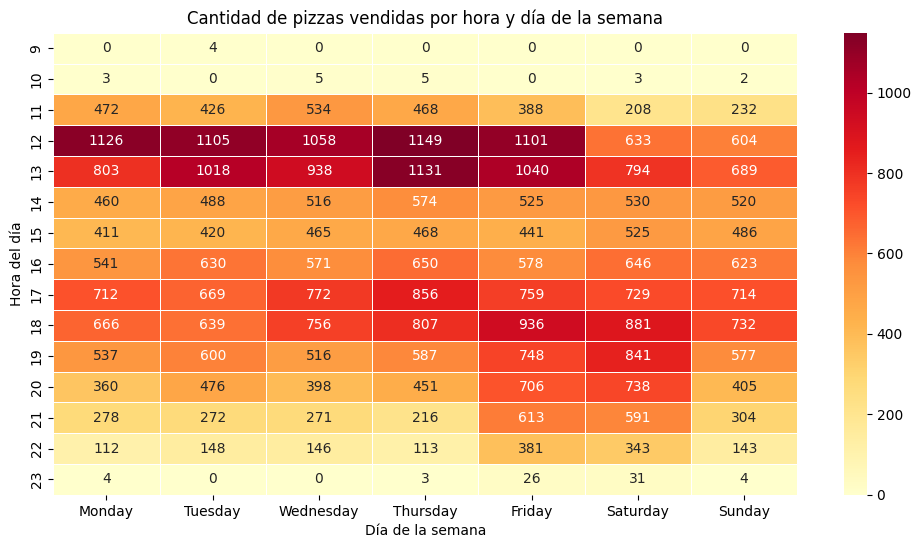

In [21]:
#En la tabla pivoteada que creamos podemos observar los datos pero para una mejor visualización haremso un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=.5)
plt.title('Cantidad de pizzas vendidas por hora y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')
plt.show()

Está gráfica nos da una visión perfecta del comportamiento de ventas que tiene la pizzería por día y hora durante todo el año pero aunque esta información nos da un panorama amplio y hasta podriamos empezar a sacar alguans conclusioens nosotros tenemos que obtener un dato más exacto por lo que procederemos a sacar el promedio de pizzas pedidas por hora

###¿Cuántas pizzas hacemos durante las horas pico?

In [22]:
#Vamos agrupar por hora y cantidad de pizzas elaboradas a esa hora y sacamos el promedio a partir de nuestro objeto "pizzas_prom_hr"
pizzas_prom_hr.groupby('hour')['quantity'].mean().reset_index()

,hour,quantity
0,9,4.00
1,10,2.25
2,11,8.24
3,12,18.98
4,13,17.91
5,14,10.35
6,15,9.06
7,16,11.91
8,17,14.60
9,18,15.17


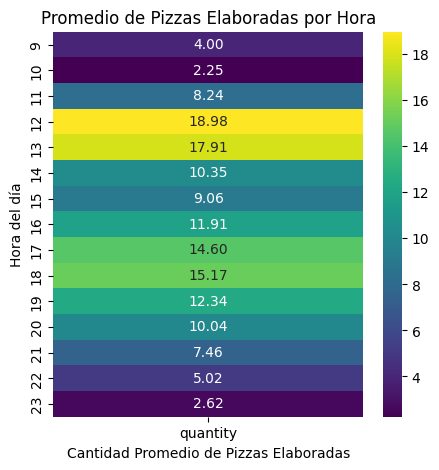

In [23]:
#Para una mejor apreciación de nuestros datos obtenidos los vamos a pasar a una gráfica de calor

# Pivoteamos los datos para organizar la gráfica
pizzas_prom_hr_pivot = pizzas_prom_hr.pivot_table(index='hour', values='quantity')

plt.figure(figsize=(5, 5))
sns.heatmap(pizzas_prom_hr_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('Promedio de Pizzas Elaboradas por Hora')
plt.xlabel('Cantidad Promedio de Pizzas Elaboradas')
plt.ylabel('Hora del día')
plt.show()

En está gráfica ya podemos destacar que las horas pico son las que se encuentran en color amarillo con la cantidad promedio de pizzas que se elaboran de 12 a 2pm pero aun pdoemos visualizar los datos de uan mejor manera con una gráfica de lineas

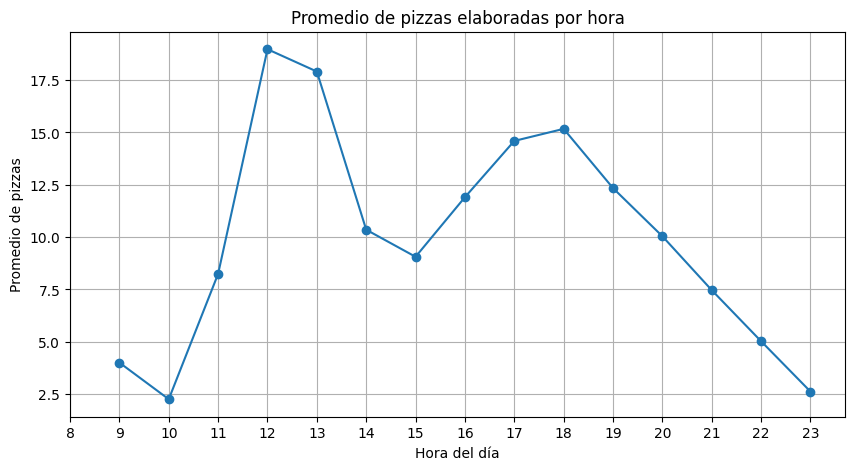

In [69]:
#Y para una visualziación más clara y detectar las horas pico hacemos una gráfica de lineas
pizzas_prom_hr_avg = pizzas_prom_hr.groupby('hour')['quantity'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(pizzas_prom_hr_avg['hour'], pizzas_prom_hr_avg['quantity'], marker='o')
plt.title('Promedio de pizzas elaboradas por hora')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de pizzas')
plt.xticks(range(8, 24))  # Asegura que se muestren todas las horas
plt.grid(True)
plt.show()


Respuesta:
- “En las horas pico, el negocio elabora en promedio entre 18 y 19 pizzas por hora. Las horas pico identificadas fueron entre 12 y 14 hrs y de 16 a 18 hrs, que es cuando se registra la mayor cantidad promedio de pizzas elaboradas.”

##¿Cuales son las pizzas más vendidas y las menos vendidas?


In [71]:
#Realizamos un nuevo objeto qu enos indique las pizzas más pedidas agrupando y sumando las variables pizza_name y quantity
pizzas_top = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

In [26]:
#Detectamos las 5 pizzas más solicitadas
pizzas_top.head(5)

,pizza_name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


In [27]:
#sacamos la lista de las 5 pizzas menos solicitadas
pizzas_top.tail(5)

,pizza_name,quantity
24,The Soppressata Pizza,961
28,The Spinach Supreme Pizza,950
3,The Calabrese Pizza,937
16,The Mediterranean Pizza,934
2,The Brie Carre Pizza,490


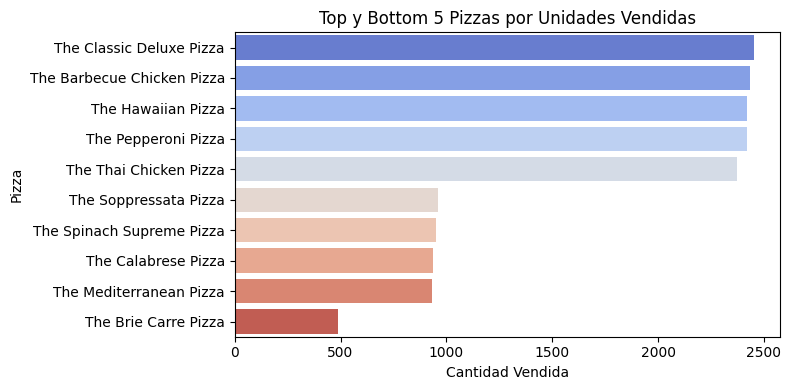

In [28]:
# Agrupar y sumar cantidad vendida por pizza
ventas_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending = False)

# Seleccionar bottom 5 y top 5
bottom_5 = ventas_pizzas.head(5)
top_5 = ventas_pizzas.tail(5)



# Combinar ambos en un solo DataFrame
ranking = pd.concat([bottom_5, top_5])

# Graficar las 5 pizzas más vendidas y menos vendidas
plt.figure(figsize=(8, 4))
sns.barplot(x=ranking.values, y=ranking.index, hue=ranking.index, palette='coolwarm', legend=False)
plt.title('Top y Bottom 5 Pizzas por Unidades Vendidas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Pizza')
plt.tight_layout()
plt.show()


Respuesta:

Las 5 pizzas más vendidas son:

- The Classic Deluxe Pizza -	2453
-	The Barbecue Chicken Pizza -	2432
-	The Hawaiian Pizza - 2422
-	The Pepperoni Pizza	- 2418
-	The Thai Chicken Pizza - 2371

Y la pizza menos vendida es:

- The Brie Carre Pizza con	490

¿Que tamaños de las pizzas son las más solicitadas?

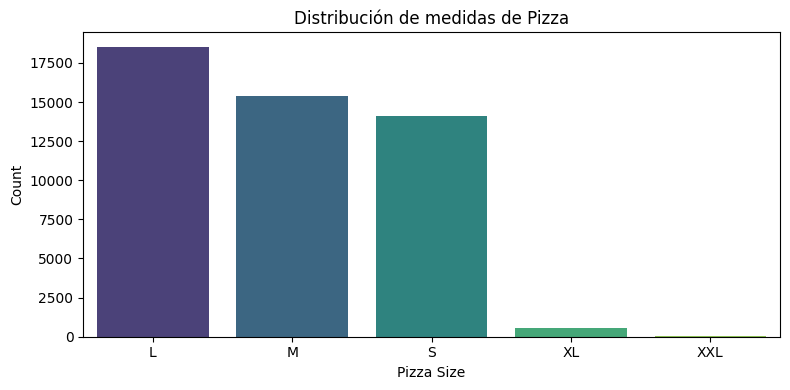

In [29]:
# Creamos un objeto con las cantidades de tamaños de pizzas solicitadas para saber que tamaño tiene mayor demanda
pizza_size_counts = df.pizza_size.value_counts()

# Creamos una grafica de barras para la visualización
plt.figure(figsize=(8, 4))
sns.barplot(x=pizza_size_counts.index, y=pizza_size_counts.values, hue=pizza_size_counts.index, palette='viridis', legend=False)
plt.title('Distribución de medidas de Pizza')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Respuesta:
- Los tamaños más solicitados en las pizzas son Chica, mediana y Grande siendo esta última la más solicitada
- Y los tamaños Extra Grande y Doble Extra Grande practicamente no figuran mucho en las ventas

In [30]:
#Utilizando la variable pizza_id que nos indica la pizza y tamaño podemos sacar la lista de pizzas de acuerdo a su demanda
pizza_talla = df.groupby('pizza_id')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
pizza_talla.head(10)

,pizza_id,quantity
3,big_meat_s,1914
80,thai_ckn_l,1410
20,five_cheese_l,1409
21,four_cheese_l,1316
18,classic_dlx_m,1181
68,spicy_ital_l,1109
28,hawaiian_s,1020
65,southw_ckn_l,1016
0,bbq_ckn_l,992
1,bbq_ckn_m,956


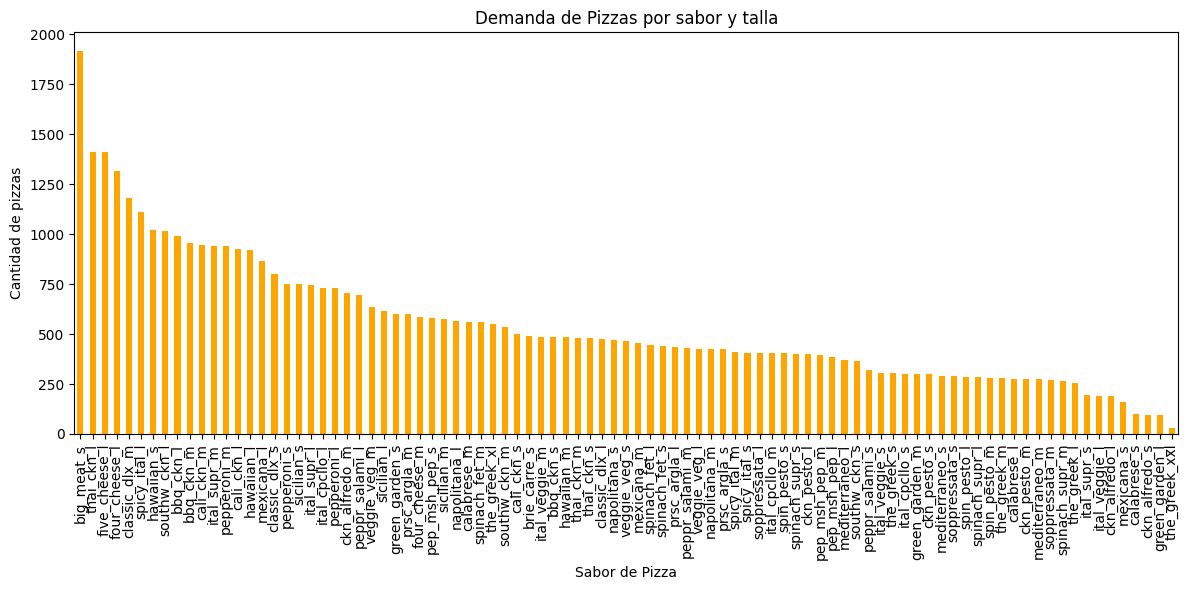

In [31]:
#Aunque no es eticamente graficar tatas varibles, esta grafica por pizzas y tamaños solicitados
#nos puede decir que pizza es la más solicitada y la menos solicitada
pizza_talla.plot(kind='bar', x='pizza_id', y='quantity', legend=False, color='orange', figsize=(12, 6))
plt.title('Demanda de Pizzas por sabor y talla')
plt.xlabel('Sabor de Pizza')
plt.ylabel('Cantidad de pizzas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['order_id', 'order_details_id', 'pizza_id', 'quantity', 'pizza_name',
       'pizza_category', 'pizza_ingredients', 'pizza_size', 'unit_price',
       'total_price', 'order_date', 'day_of_week', 'week', 'month', 'hour'],
      dtype='object')

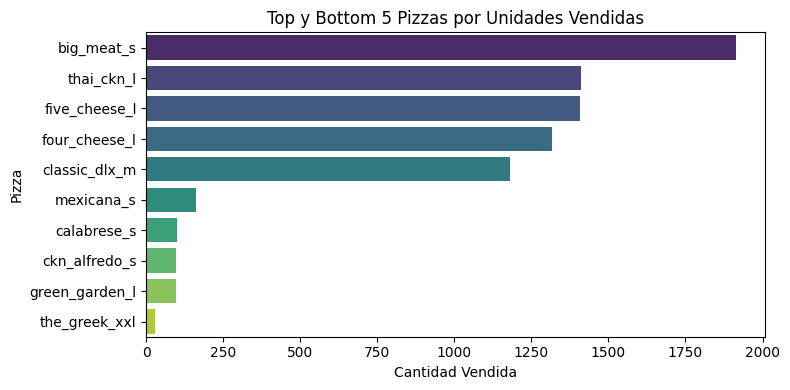

In [33]:
# Graficamos las 5 pizzas más y menos pedidas pro tamaño y tipo de pizza
bottom_5 = pizza_talla.head(5)
top_5 = pizza_talla.tail(5)

# Combinar ambos en un solo DataFrame
ranking = pd.concat([bottom_5, top_5])

# Graficar las 5 pizzas más vendidas y menos vendidas
plt.figure(figsize=(8, 4))
sns.barplot(x=ranking['quantity'], y=ranking['pizza_id'], hue=ranking['pizza_id'], palette='viridis', legend=False)
plt.title('Top y Bottom 5 Pizzas por Unidades Vendidas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Pizza')
plt.tight_layout()
plt.show()

##¿Cuál es el ticket promedio?

In [34]:
#Sacamos el precio promedio de ticket por día de todo el año
df.groupby(['order_id','day_of_week'])['total_price'].sum().reset_index().pivot_table(index='day_of_week', values='total_price', aggfunc='mean')

,total_price
day_of_week,
Friday,38.46
Monday,38.41
Saturday,39.01
Sunday,37.81
Thursday,38.14
Tuesday,38.39
Wednesday,37.83


In [35]:
total_ventas = df['total_price'].sum()
total_ordenes = df['order_id'].nunique()
precio_promedio_orden = total_ventas / total_ordenes
print(f"Precio promedio por orden: ${precio_promedio_orden:.2f}")

Precio promedio por orden: $38.31


Resultado:
- El ticket promedio general de todo el año es de $38.31 y realmente no varia en gran medida si el ticket promedio lo sacamos por dias de la semana


##¿Qué tan bien estamos utilizando nuestra capacidad de asientos? (tenemos 60 asientos)

In [36]:
# Diccionario para mapear tamaño a número de personas
tamanos = {
    'S': 1,
    'M': 2,
    'L': 4,
    'XL': 5,
    'XXL': 6
}

# Crear nueva columna con el valor asignado
df['personas'] = df['pizza_size'].map(tamanos)
df

,order_id,order_details_id,pizza_id,quantity,pizza_name,pizza_category,pizza_ingredients,pizza_size,unit_price,total_price,order_date,day_of_week,week,month,hour,personas
order_datetime,,,,,,,,,,,,,,,,
2015-01-01 11:38:36,1,1,hawaiian_m,1,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25,2015-01-01,Thursday,1,1,11,2
2015-01-01 11:57:40,2,2,classic_dlx_m,1,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,16.00,2015-01-01,Thursday,1,1,11,2
2015-01-01 11:57:40,2,3,five_cheese_l,1,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,18.50,2015-01-01,Thursday,1,1,11,4
2015-01-01 11:57:40,2,4,ital_supr_l,1,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,20.75,2015-01-01,Thursday,1,1,11,4
2015-01-01 11:57:40,2,5,mexicana_m,1,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,16.00,2015-01-01,Thursday,1,1,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:23:10,21348,48616,ckn_alfredo_m,1,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,16.75,2015-12-31,Thursday,53,12,21,2
2015-12-31 21:23:10,21348,48617,four_cheese_l,1,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,17.95,2015-12-31,Thursday,53,12,21,4
2015-12-31 21:23:10,21348,48618,napolitana_s,1,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,12.00,2015-12-31,Thursday,53,12,21,1


In [37]:
promedio_por_hora_dia = df.groupby(['order_date', 'hour', 'day_of_week'])['personas'].sum().reset_index()
promedio_por_hora_dia

,order_date,hour,day_of_week,personas
0,2015-01-01,11,Thursday,18
1,2015-01-01,12,Thursday,35
2,2015-01-01,13,Thursday,95
3,2015-01-01,14,Thursday,38
4,2015-01-01,15,Thursday,35
...,...,...,...,...
4176,2015-12-31,19,Thursday,63
4177,2015-12-31,20,Thursday,40
4178,2015-12-31,21,Thursday,16
4179,2015-12-31,22,Thursday,4


In [38]:
# Crear tabla de promedio por hora y día de la semana
promedio_por_hora_dia_pivot = promedio_por_hora_dia.pivot_table(
    index='hour',
    columns='day_of_week',
    values='personas',
    aggfunc='mean'
).fillna(0)

#Ordenar los dias de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promedio_por_hora_dia_pivot = promedio_por_hora_dia_pivot.reindex(columns=dias_ordenados)

promedio_por_hora_dia_pivot

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
9,0.00,17.00,0.00,0.00,0.00,0.00,0.00
10,7.00,0.00,4.00,4.67,0.00,8.00,6.00
11,24.12,21.21,25.60,23.16,19.42,12.28,13.29
12,57.35,52.17,48.75,53.77,54.76,28.41,28.23
13,40.17,48.29,43.73,53.85,51.72,36.83,31.71
14,23.66,24.80,23.96,27.25,25.06,24.65,24.74
15,21.15,20.27,22.92,21.87,20.72,24.12,23.94
16,27.75,29.81,28.17,30.94,30.23,31.17,28.81
17,38.25,32.08,36.81,40.25,38.96,34.58,33.79


In [39]:
#Saquemos el porcentaje de ocupación por cada hora de cada día de la seman atomando en cuenta que hay 60 asientos
porcentaje_por_hora = (promedio_por_hora_dia_pivot / 60) * 100
porcentaje_por_hora# = porcentaje_por_hora.round(1)  # Redondear a 1 decimal

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
9,0.00,28.33,0.00,0.00,0.00,0.00,0.00
10,11.67,0.00,6.67,7.78,0.00,13.33,10.00
11,40.21,35.35,42.67,38.60,32.37,20.47,22.14
12,95.59,86.96,81.25,89.62,91.27,47.35,47.05
13,66.94,80.48,72.88,89.74,86.20,61.38,52.85
14,39.43,41.33,39.93,45.42,41.77,41.08,41.23
15,35.24,33.79,38.20,36.44,34.53,40.19,39.90
16,46.25,49.68,46.96,51.57,50.38,51.96,48.01
17,63.75,53.46,61.35,67.08,64.93,57.63,56.31


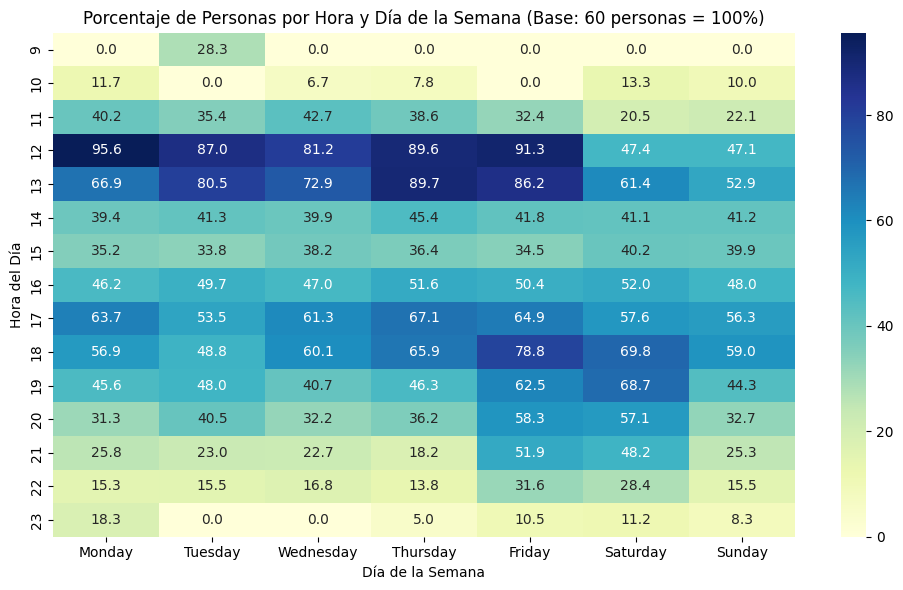

In [40]:
#Gráfica de calor
plt.figure(figsize=(10, 6))
sns.heatmap(porcentaje_por_hora, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Porcentaje de Personas por Hora y Día de la Semana (Base: 60 personas = 100%)')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.show()

Respuesta:
- Se puede notar en la gráfica que en las horas pico de pedidos es cuando esta casi al 100% de ocupación que viene siendo entre 12 y 2pm pero solamente de lunes a viernes

##Estadistica de ingredientes (Bonus)

In [62]:
#Vamos a contabilizar la frecuencia de cada ingrediente
from collections import Counter

# Paso 1: Obtener todos los ingredientes en una sola lista
ingredientes = df['pizza_ingredients'].str.split(', ')

# Paso 2: Aplanar la lista de listas en una sola lista
todos_ingredientes = [ingrediente for sublist in ingredientes for ingrediente in sublist]

# Paso 3: Contar la frecuencia de cada ingrediente
conteo_ingredientes = Counter(todos_ingredientes)

# Paso 4: Convertir a DataFrame si quieres visualizarlo o graficarlo
ingredientes_df = pd.DataFrame(conteo_ingredientes.items(), columns=['Ingrediente', 'Frecuencia'])
ingredientes_df = ingredientes_df.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)



In [63]:
#los 10 ingredientes más usados en la pizzeria
ingredientes_df.head(10)

,Ingrediente,Frecuencia
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


In [44]:
#Los 10 ingredientes menos usados
ingredientes_df.tail(10)

,Ingrediente,Frecuencia
55,Soppressata Salami,957
56,Friggitello Peppers,927
57,Pancetta,927
58,慛duja Salami,927
59,Plum Tomatoes,923
60,Brie Carre Cheese,480
61,Prosciutto,480
62,Caramelized Onions,480
63,Pears,480
64,Thyme,480


In [45]:
#Total de ingredientes utilizados en cocina
ingredientes_df.Ingrediente.nunique()

65

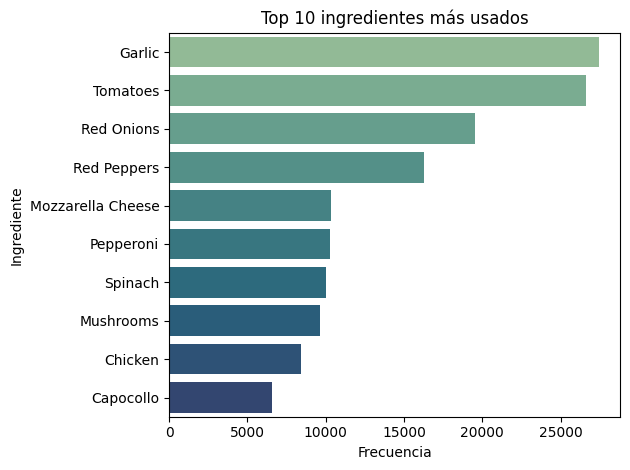

In [46]:
#Gráfica de los 10 ingredientes más requeridos en la pizzería
top_ingredientes = ingredientes_df.head(10)

sns.barplot(data=top_ingredientes, x='Frecuencia', y='Ingrediente', palette='crest')
plt.title('Top 10 ingredientes más usados')
plt.xlabel('Frecuencia')
plt.ylabel('Ingrediente')
plt.tight_layout()
plt.show()

##Tendencia de ingresos por semana

In [67]:
#Ingresos semanales durante el año
df.groupby('week')['total_price'].sum()

,total_price
week,
1,9863.60
2,15999.05
3,15115.95
4,15652.80
5,16351.10
6,16175.70
7,16085.55
8,15345.90
9,15961.80


In [50]:
#Aplicamos el dato estadictico para los ingresos semanales
df.groupby('week')['total_price'].sum().describe()

,total_price
count,53.00
mean,15431.32
std,1924.54
min,7244.25
25%,15345.90
50%,15888.70
75%,16250.20
max,19753.90


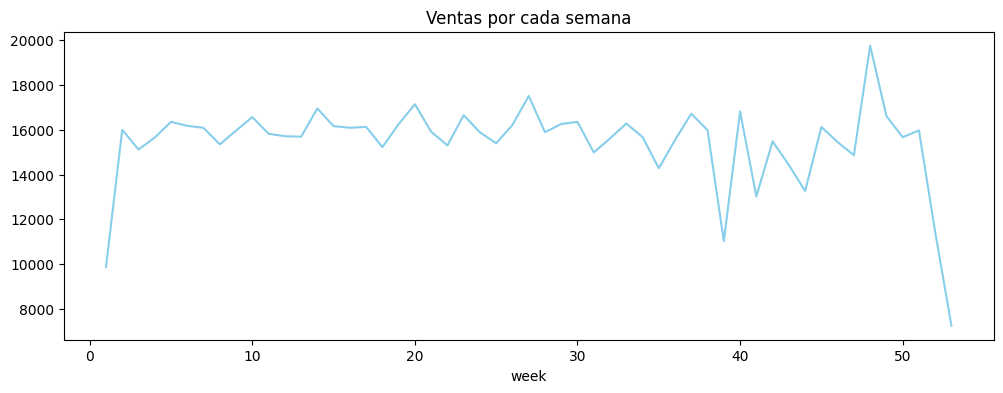

In [51]:
#Gráfica de Ventas por Semana
vtas_semanal = df.groupby('week')['total_price'].sum().plot( kind='line',
                                             color='skyblue',
                                              figsize=(12, 4),
                                              title='Ventas por cada semana') ;

- El promedio de ventas semanal es de $15,431.32.

- La semana más baja de ventas fue de $7,244.25.

- La semana más alta en ventas fue de $19,753.90


## Reporte de Ventas Mensual

In [52]:
#Promedio de ventas mensual
df.groupby('month')['total_price'].sum().mean()

np.float64(68155.00416666667)

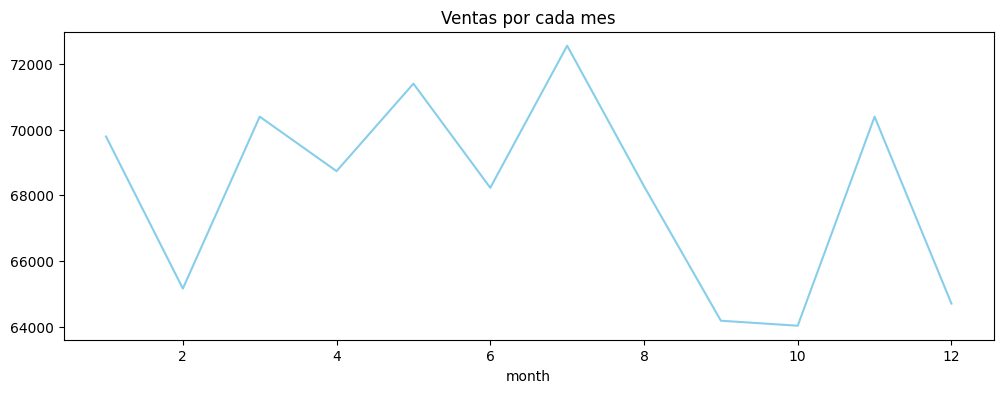

In [53]:
#Gráfica de ventas mensuales
vtas_mensual = df.groupby('month')['total_price'].sum().plot( kind='line',
                                             color='skyblue',
                                              figsize=(12, 4),
                                              title='Ventas por cada mes') ;

In [54]:
#Datso estadísticos de los ingresos mensuales
df.groupby('month')['total_price'].sum().describe()

,total_price
count,12.00
mean,68155.00
std,2965.87
min,64027.60
25%,65044.99
50%,68507.52
75%,70395.79
max,72557.90


- El promedio de ventas mensual fue de $68,155.00

- El mes más bajo de ventas fue de $64,027.60.

- El mes más alto en ventas fue de $72,557.90

##Ticket promedio

In [55]:
#Estadístico de ticket promedio
df.groupby('order_id')['total_price'].sum().describe()

,total_price
count,21350.00
mean,38.31
std,30.65
min,9.75
25%,17.95
50%,32.50
75%,49.50
max,444.20


- El ticket promedio de ventas es de $38.31 dlls

- Ticket minimo es de $9.75dlls

- El ticket más alto es de $44.20 dlls

## ¿Vale la pena estar abriendo la pizzeria tan temprano y cerrando tan noche? (Bonus)
¿Cual es el promedio de ventas de cada hora?

In [56]:
#Ventas de todo el año por hora
df.groupby('hour')['total_price'].sum()

,total_price
hour,
9,83.00
10,303.65
11,44935.80
12,111877.90
13,106065.70
14,59201.40
15,52992.30
16,70055.40
17,86237.45


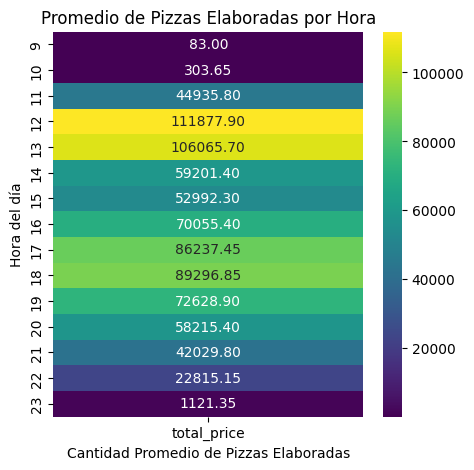

In [68]:
#Visualización gráfica con mapa de calor
vtas_hora = df.groupby('hour')['total_price'].sum().reset_index()

# Grafica de Heat-Map
vtas_per_hr = vtas_hora.pivot_table(index='hour', values='total_price')

plt.figure(figsize=(5, 5))
sns.heatmap(vtas_per_hr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Promedio de Pizzas Elaboradas por Hora')
plt.xlabel('Cantidad Promedio de Pizzas Elaboradas')
plt.ylabel('Hora del día')
plt.show()

In [58]:
#Sacamos elporcentaje de ventas por cada hora del negocio abierto
vtas_hora['%_vtas_hr'] = vtas_hora['total_price'] / vtas_hora['total_price'].sum() * 100
vtas_hora

,hour,total_price,%_vtas_hr
0,9,83.00,0.01
1,10,303.65,0.04
2,11,44935.80,5.49
3,12,111877.90,13.68
4,13,106065.70,12.97
5,14,59201.40,7.24
6,15,52992.30,6.48
7,16,70055.40,8.57
8,17,86237.45,10.54
9,18,89296.85,10.92


In [59]:
#Suponiendo que se tienen 15 trabajadores y el salario por hora es de $7.25 dlls
# entonces el costo por hora de nomina es de $108.75 y $1,512 dlls por día y por hora al año la nomina cuesta $39,693 dlls
vtas_hora['nom_hr'] = 39693
vtas_hora

,hour,total_price,%_vtas_hr,nom_hr
0,9,83.00,0.01,39693
1,10,303.65,0.04,39693
2,11,44935.80,5.49,39693
3,12,111877.90,13.68,39693
4,13,106065.70,12.97,39693
5,14,59201.40,7.24,39693
6,15,52992.30,6.48,39693
7,16,70055.40,8.57,39693
8,17,86237.45,10.54,39693
9,18,89296.85,10.92,39693


In [60]:
#Simulando la nomina menos las ventas generadas
vtas_hora['vtas-nom'] = vtas_hora['total_price'] - vtas_hora['nom_hr']
vtas_hora

,hour,total_price,%_vtas_hr,nom_hr,vtas-nom
0,9,83.00,0.01,39693,-39610.00
1,10,303.65,0.04,39693,-39389.35
2,11,44935.80,5.49,39693,5242.80
3,12,111877.90,13.68,39693,72184.90
4,13,106065.70,12.97,39693,66372.70
5,14,59201.40,7.24,39693,19508.40
6,15,52992.30,6.48,39693,13299.30
7,16,70055.40,8.57,39693,30362.40
8,17,86237.45,10.54,39693,46544.45
9,18,89296.85,10.92,39693,49603.85


Respuesta:

- Simulando el costo de la nómina detectamos que las primeras 2 horas y las últimas 2 horas en las que el negocio esta abierto, la cantidad de ventas es rebasada por el costo de la nómina, por lo que se recomendaría al negocio buscar incrementar las ventas en esos horarios o cerrar a esas horas ya que las ventas en esos horarios no cubre el costo de la nomina y son perdidas.